In [1]:
# Image Classification Using Tensorflow with GPU Enabled.
# DEMO FOR BOEING WITH GPU ENABLED.

In [2]:
import tensorflow as tf 
from tensorflow import keras 
from keras import layers 
  
import numpy as np 
import matplotlib.pyplot as plt 
import time
import warnings 
warnings.filterwarnings('ignore')

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs Available:", gpus)
else:
   print("No GPU found.")

2025-03-09 18:11:31.482718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-09 18:11:31.496049: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-09 18:11:31.500135: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 18:11:31.511168: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-09 18:11:32.757544: W tensorflow/compiler/tf2

GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
cifar100 = tf.keras.datasets.cifar100 

  
# Distribute it to train and test set 
(x_train, y_train), (x_val, y_val) = cifar100.load_data() 
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape) 
num_samples = 10_000
indices = np.random.choice(x_train.shape[0], num_samples, replace=False)
x_train, y_train = x_train[indices], y_train[indices]

print(f"Selected training dataset shape: {x_train.shape}, Labels shape: {y_train.shape}")


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
Selected training dataset shape: (10000, 32, 32, 3), Labels shape: (10000, 1)


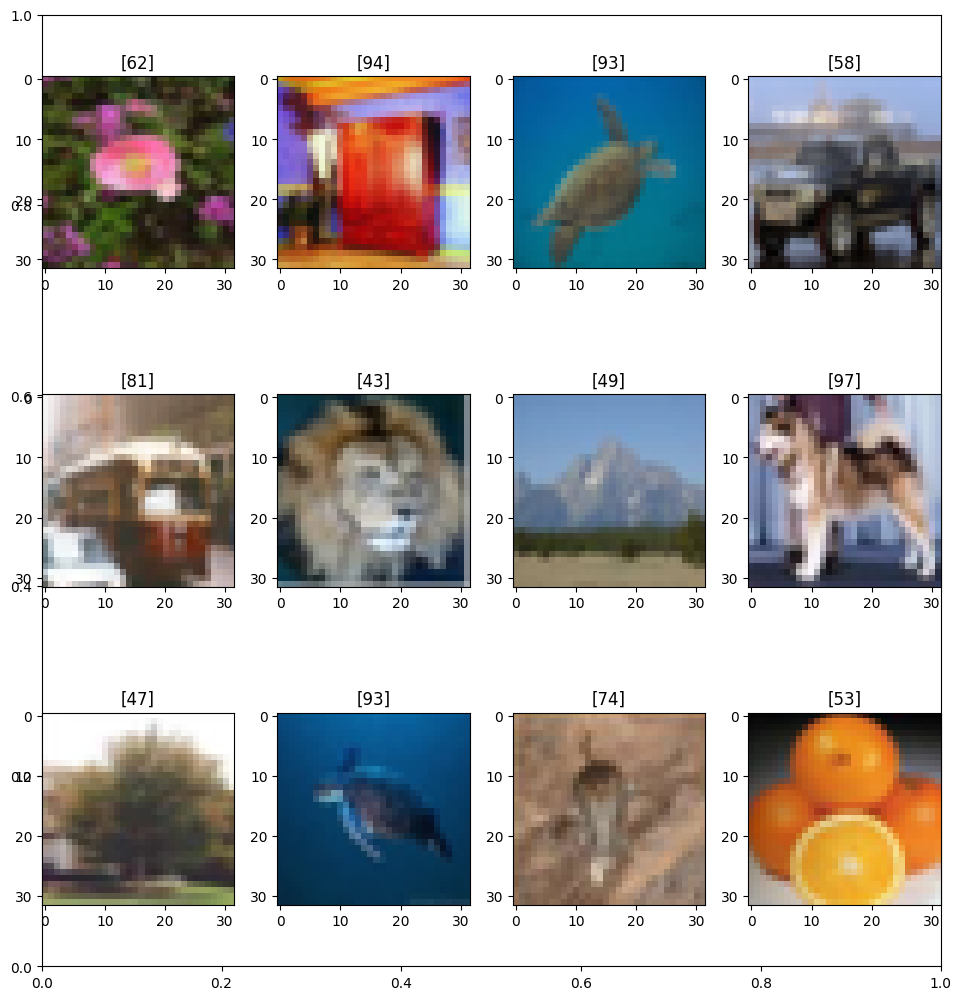

In [4]:
def show_samples(data, labels): 
    plt.subplots(figsize=(10, 10)) 
    for i in range(12): 
        plt.subplot(3, 4, i+1) 
        k = np.random.randint(0, data.shape[0]) 
        plt.title(labels[k]) 
        plt.imshow(data[k]) 
    plt.tight_layout() 
    plt.show() 
  
  
show_samples(x_train, y_train) 

In [5]:
#Data Splitting

In [6]:
y_train = tf.one_hot(y_train, 
                     depth=y_train.max() + 1, 
                     dtype=tf.float64) 
y_val = tf.one_hot(y_val, 
                   depth=y_val.max() + 1, 
                   dtype=tf.float64) 
  
y_train = tf.squeeze(y_train) 
y_val = tf.squeeze(y_val) 

2025-03-09 18:11:36.843388: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1090 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:35:00.0, compute capability: 8.9


In [7]:
model = tf.keras.models.Sequential([ 
	layers.Conv2D(16, (3, 3), activation='relu', 
				input_shape=(32, 32, 3), padding='same'), 
	layers.Conv2D(32, (3, 3), 
				activation='relu', 
				padding='same'), 
	layers.Conv2D(64, (3, 3), 
				activation='relu', 
				padding='same'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(128, (3, 3), 
				activation='relu', 
				padding='same'), 


	layers.Flatten(), 
	layers.Dense(256, activation='relu'), 
	layers.BatchNormalization(), 
	layers.Dense(256, activation='relu'), 
	layers.Dropout(0.3), 
	layers.BatchNormalization(), 
	layers.Dense(100, activation='softmax') 
]) 

model.compile( 
	loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
	optimizer='adam', 
	metrics=['AUC', 'accuracy'] 
) 


In [8]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,579,844 (32.73 MB)

 Trainable params: 8,578,820 (32.73 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [9]:
epoch_time_start = int(time.time())
hist = model.fit(x_train, y_train, 
				epochs=2, 
				batch_size=64, 
				verbose=1, 
				validation_data=(x_val, y_val)) 
epoch_time_end = int(time.time())
print(" The Model takes " + str(epoch_time_end - epoch_time_start) + " secs")

Epoch 1/2


I0000 00:00:1741543900.836447    1231 service.cc:146] XLA service 0x7f8458016560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741543900.836476    1231 service.cc:154]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2025-03-09 18:11:40.881573: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-09 18:11:41.125305: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2025-03-09 18:11:47.224793: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1592', 152 bytes spill stores, 152 bytes spill loads

2025-03-09 18:11:47.252692: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fus

153/157 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6357 - accuracy: 0.0375 - loss: 4.6347

2025-03-09 18:11:51.308825: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1322', 12 bytes spill stores, 12 bytes spill loads



157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - AUC: 0.6382 - accuracy: 0.0382 - loss: 4.6242 - val_AUC: 0.6298 - val_accuracy: 0.0588 - val_loss: 5.7402
Epoch 2/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7635 - accuracy: 0.0904 - loss: 4.0561 - val_AUC: 0.7713 - val_accuracy: 0.1034 - val_loss: 3.9845
 The Model takes 21 secs
